In [46]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
import csv
import time
import os
from matplotlib import pyplot as plt
import sys
import processing_functions as pf
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec
sys.path.append('../../../scripts/')

# import and process time tracker data
def process_time_tracker(filepath, real, dT, dP, dCV, demand, name_add):
    df_time_tracker = pd.read_csv(filepath + 'df_time_tracker_{}P{}T{}_dCV{}_real{}_demand{}.csv'.format(name_add, dP, dT, dCV, real, demand))
    if not df_time_tracker.empty:
        df_time_tracker['plan_date'] = pd.to_datetime(df_time_tracker['plan_date'])
        df_time_tracker['deploy_date'] = pd.to_datetime(df_time_tracker['deploy_date'])
        df_time_tracker['ramp_down_date'] = pd.to_datetime(df_time_tracker['ramp_down_date'])
    return df_time_tracker


# function to re-format time tracker data
def process_new_df(df_time_tracker):
    #np.random.seed(42)
    jitter_strength = 0.15
    start = pd.to_datetime("2020-01-01")
    end   = pd.to_datetime("2070-12-31")
    rows = [{'date': start, 'inf_count': 0}]
    if df_time_tracker.empty:
        rows.append({'date': end, 'inf_count': 0})
    else:
        for i, row in df_time_tracker.iterrows():
            rows.append({'date': row['plan_date'], 'inf_count': i})
            rows.append({'date': row['plan_date'], 'inf_count': i+1})
        
        rows.append({'date': end, 'inf_count': i+1})
    
    new_df = pd.DataFrame(rows)
    
    # Create one jitter value per pair
    pair_jitter = np.random.uniform(-jitter_strength, jitter_strength,
    size=len(new_df) // 2)
    # Repeat each jitter twice and add to row_id
    new_df['inf_count_jitter'] = (new_df['inf_count'] + np.repeat(pair_jitter, 2))
    return new_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# fix/check directory location
#os.chdir("../../")
os.getcwd()

'/Users/jenniferskerker/Documents/GradSchool/Research/Equity/Model/Santa_Cruz_WRM_updated/scripts'

In [48]:
# loop through scenarios- modcool 
np.random.seed(42)
# set filepath for where data is saved
#filepath =
# moderate, cool scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [0, 1]
dP_All = [100]
dCV_All = [1.0]
demand_All = ['Baseline']
combinations = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
name_add = ''
df_list_modcool = []
df_inf_count_modcool = []

df_list = []
for combo in combinations:
    real = combo[0]
    dT = combo[1]
    dP = combo[2]
    dCV = combo[3]
    demand = combo[4]
    df_time_tracker = process_time_tracker(filepath, real, dT, dP, dCV, demand, name_add)
    df_new = process_new_df(df_time_tracker)
    df_list_modcool.append(df_new)
    # get inf count
    inf = len(df_time_tracker)
    df_inf_count_modcool.append(inf)
    

In [49]:
# loop through scenarios- dryhot 
#np.random.seed(42)
# set filepath for where data is saved
#filepath =
# moderate, cool scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [4, 5]
dP_All = [80]
dCV_All = [1.2]
demand_All = ['Baseline']
combinations = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
name_add = ''
df_list_dryhot = []
df_inf_count_dryhot = []

df_list = []
for combo in combinations:
    real = combo[0]
    dT = combo[1]
    dP = combo[2]
    dCV = combo[3]
    demand = combo[4]
    df_time_tracker = process_time_tracker(filepath, real, dT, dP, dCV, demand, name_add)
    df_new = process_new_df(df_time_tracker)
    df_list_dryhot.append(df_new)
    # get inf count
    inf = len(df_time_tracker)
    df_inf_count_dryhot.append(inf)

In [50]:
# loop through scenarios- all 
#np.random.seed(42)
# set filepath for where data is saved
#filepath =
# moderate, cool scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [0, 1, 2, 3, 4, 5]
dP_All = [80, 90, 100, 110, 120]
dCV_All = [1.0, 1.1, 1.2]
demand_All = ['Baseline']
combinations = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
name_add = ''
df_list_all = []
df_inf_count_all = []

df_list = []
for combo in combinations:
    real = combo[0]
    dT = combo[1]
    dP = combo[2]
    dCV = combo[3]
    demand = combo[4]
    df_time_tracker = process_time_tracker(filepath, real, dT, dP, dCV, demand, name_add)
    df_new = process_new_df(df_time_tracker)
    df_list_all.append(df_new)
    # get inf count
    inf = len(df_time_tracker)
    df_inf_count_all.append(inf)

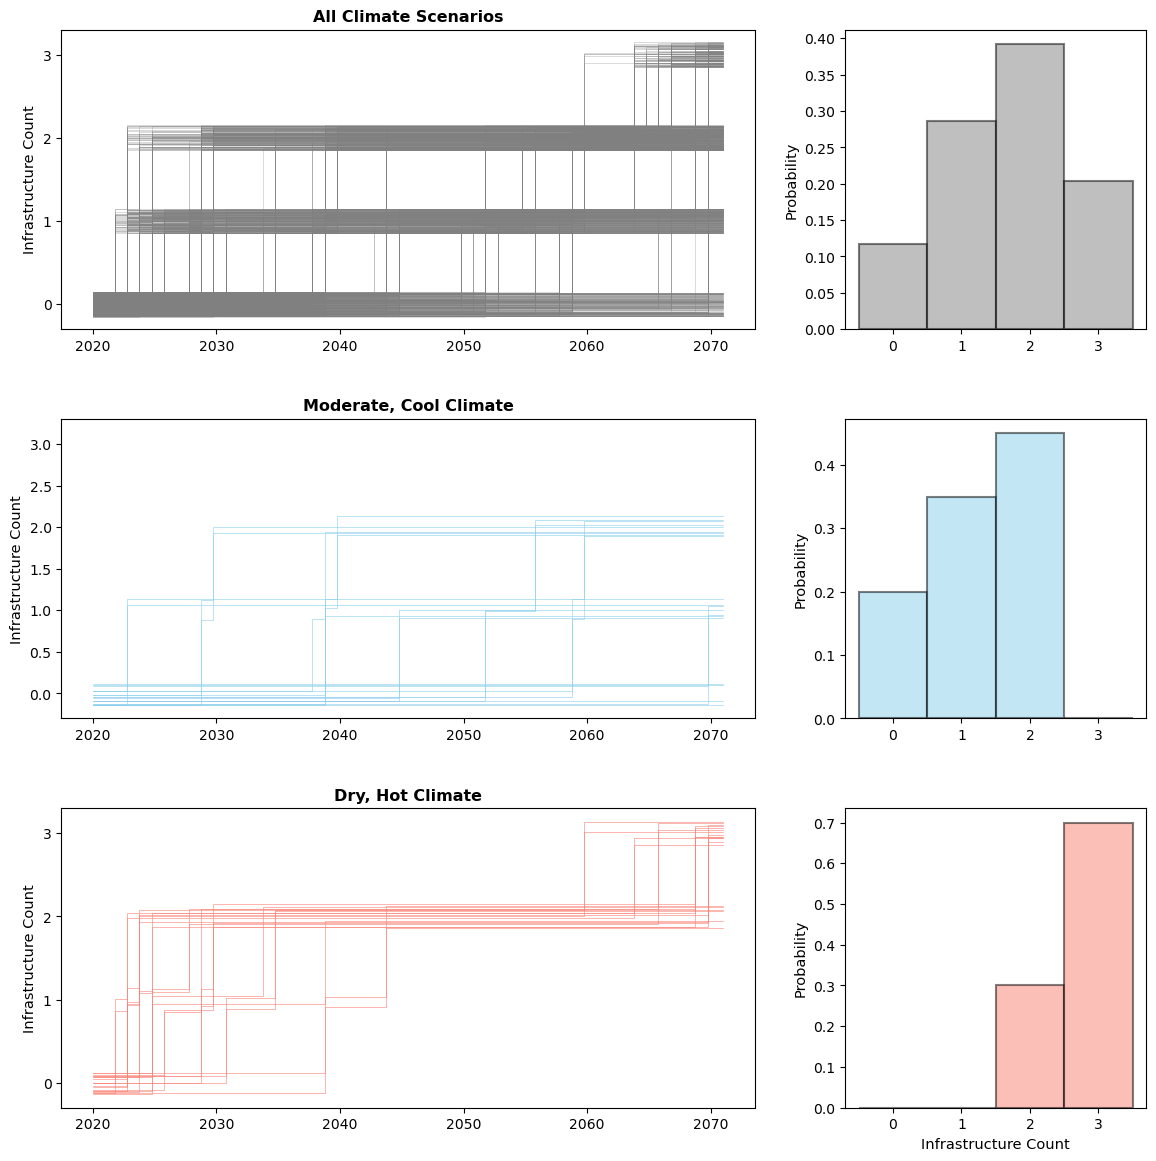

In [69]:
# make time series plot of inf deployment for multiple scenarios
# fix jitter b/c will be the same
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(3, 3, hspace=0.3, wspace=0.3)

# set plotting parameters
alpha=0.4
lw = 0.4
ft = 10.5
bin_edges = [-0.5, 0.5, 1.5, 2.5, 3.5]

# subplot 1: All climate scenarios
ax_top = fig.add_subplot(gs[0, 0:2])
for i in range(len(df_list_all)):
    df = df_list_all[i]
    ax_top.plot(df['date'], df['inf_count_jitter'], color='gray', linewidth=lw, alpha=0.5)
ax_top.set_yticks([0, 1, 2, 3])
ax_top.set_ylim((-0.3, 3.3))
ax_top.set_ylabel('Infrastructure Count', fontsize=ft)
ax_top.set_title('All Climate Scenarios', fontsize=ft+1, fontweight='bold')

# subplot 1b: histogram of all climate scenarios
ax_top_b = fig.add_subplot(gs[0, 2])
counts, bin_edges, patches = ax_top_b.hist(df_inf_count_all, bins=bin_edges, color='gray', density=True, edgecolor='black', linewidth=1.5, alpha=0.5)
ax_top_b.set_xticks([0, 1, 2, 3])
ax_top_b.set_ylabel('Probability', fontsize=ft)
# Compute bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# Set xticks at bin centers
ax_top_b.set_xticks(bin_centers)
# Set custom text labels (example)
ax_top_b.set_xticklabels(["0", "1", "2", "3"])

# subplot 2: Moderate, cool
ax_1 = fig.add_subplot(gs[1, 0:2])
for i in range(len(df_list_modcool)):
    df = df_list_modcool[i]
    ax_1.plot(df['date'], df['inf_count_jitter'], color='skyblue', linewidth=lw)
#ax_1.set_yticks([0, 1, 2, 3])
ax_1.set_ylabel('Infrastructure Count', fontsize=ft)
ax_1.set_ylim((-0.3, 3.3))
ax_1.set_title('Moderate, Cool Climate', fontsize=ft+1, fontweight='bold')

# subplot 2b: histogram of moderate, cool
ax_1_b = fig.add_subplot(gs[1, 2])
counts, bin_edges, patches = ax_1_b.hist(df_inf_count_modcool, bins=bin_edges, color='skyblue', density=True, edgecolor='black', linewidth=1.5, alpha=0.5)
ax_1_b.set_xticks([0, 1, 2, 3])
ax_1_b.set_ylabel('Probability', fontsize=ft)
# Compute bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# Set xticks at bin centers
ax_1_b.set_xticks(bin_centers)
# Set custom text labels (example)
ax_1_b.set_xticklabels(["0", "1", "2", "3"])

# subplot 1: Dry, hot
ax_2 = fig.add_subplot(gs[2, 0:2])
for i in range(len(df_list_dryhot)):
    df = df_list_dryhot[i]
    ax_2.plot(df['date'], df['inf_count_jitter'], color='salmon', linewidth=lw)
ax_2.set_yticks([0, 1, 2, 3])
ax_2.set_ylim((-0.3, 3.3))
ax_2.set_ylabel('Infrastructure Count', fontsize=ft)
ax_2.set_title('Dry, Hot Climate', fontsize=ft+1, fontweight='bold')

# subplot 3b: histogram of dry, hot
ax_2_b = fig.add_subplot(gs[2, 2])
counts, bin_edges, patches = ax_2_b.hist(df_inf_count_dryhot, bins=bin_edges, color='salmon', density=True, edgecolor='black', linewidth=1.5, alpha=0.5)
ax_2_b.set_xticks([0, 1, 2, 3])
ax_2_b.set_ylabel('Probability', fontsize=ft)
ax_2_b.set_xlabel('Infrastructure Count', fontsize=ft)
# Compute bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# Set xticks at bin centers
ax_2_b.set_xticks(bin_centers)
# Set custom text labels (example)
ax_2_b.set_xticklabels(["0", "1", "2", "3"])

plt.savefig('../outputs/Figures_SI/SA_Infrastructure_Deployment_Frequency.png', bbox_inches='tight', dpi=300)
plt.show()